## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import re

## Load Data

In [2]:
df = pd.read_csv('amazon.csv')
df.dropna(subset=['Text'], inplace=True)
df = df.reset_index(drop=True)

## Preprocess Text (lowercase, remove punctuation)

In [3]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['cleaned'] = df['Text'].apply(clean_text)

## TF-IDF Vectorization (uses built-in English stopwords)

In [4]:
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['cleaned'])

## Choosing K using Silhouette Score

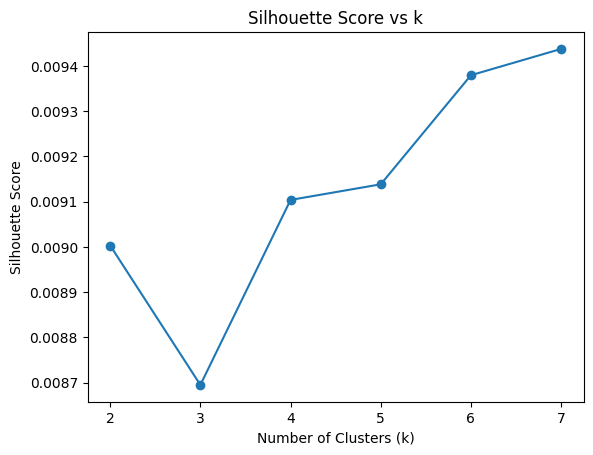

In [5]:
scores = []  
K_range = range(2, 8)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    preds = kmeans.fit_predict(X)
    score = silhouette_score(X, preds)
    scores.append(score)

plt.plot(K_range, scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.show()


## Final Clustering with Chosen k (e.g., k=3)

In [6]:
k_final = 3
model = KMeans(n_clusters=k_final, random_state=42)
df['cluster'] = model.fit_predict(X)

## Examine Top Terms in Each Cluster

In [7]:
terms = vectorizer.get_feature_names_out()
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
for i in range(k_final):
    print(f"\nCluster {i} top terms:")
    for ind in order_centroids[i, :10]:
        print(terms[ind])


Cluster 0 top terms:
use
easy
app
great
love
kindle
like
works
time
just

Cluster 1 top terms:
app
like
great
love
kindle
just
dont
free
time
really

Cluster 2 top terms:
game
fun
play
love
like
great
playing
time
really
games
